In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

2024-04-29 15:46:41.409277: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-29 15:46:41.409641: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 15:46:41.412199: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-29 15:46:41.440841: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-29 15:46:42.067841: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [2]:
# Load the dataset
data = pd.read_csv('synthesized_data.csv')

In [3]:
# Extract input and output columns
X = data[['Min_Temperature', 'Max_Temperature', 'Min_Rainfall', 'Max_Rainfall', 'Temperature', 'Rainfall']]
y = data['Price']

In [4]:
# Normalize the input features
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalize the output
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(np.array(y).reshape(-1, 1))

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [6]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

/home/samarth5854/anaconda3/envs/PsycheSail/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
66/66 - 1s - 11ms/step - loss: 0.1335 - val_loss: 0.1041
Epoch 2/100
66/66 - 0s - 1ms/step - loss: 0.0847 - val_loss: 0.0778
Epoch 3/100
66/66 - 0s - 1ms/step - loss: 0.0754 - val_loss: 0.0712
Epoch 4/100
66/66 - 0s - 1ms/step - loss: 0.0715 - val_loss: 0.0691
Epoch 5/100
66/66 - 0s - 1ms/step - loss: 0.0688 - val_loss: 0.0656
Epoch 6/100
66/66 - 0s - 1ms/step - loss: 0.0647 - val_loss: 0.0631
Epoch 7/100
66/66 - 0s - 1ms/step - loss: 0.0632 - val_loss: 0.0596
Epoch 8/100
66/66 - 0s - 1ms/step - loss: 0.0594 - val_loss: 0.0583
Epoch 9/100
66/66 - 0s - 1ms/step - loss: 0.0580 - val_loss: 0.0568
Epoch 10/100
66/66 - 0s - 1ms/step - loss: 0.0561 - val_loss: 0.0549
Epoch 11/100
66/66 - 0s - 1ms/step - loss: 0.0520 - val_loss: 0.0552
Epoch 12/100
66/66 - 0s - 1ms/step - loss: 0.0496 - val_loss: 0.0503
Epoch 13/100
66/66 - 0s - 1ms/step - loss: 0.0479 - val_loss: 0.0482
Epoch 14/100
66/66 - 0s - 1ms/step - loss: 0.0447 - val_loss: 0.0445
Epoch 15/100
66/66 - 0s - 1ms/step - loss:

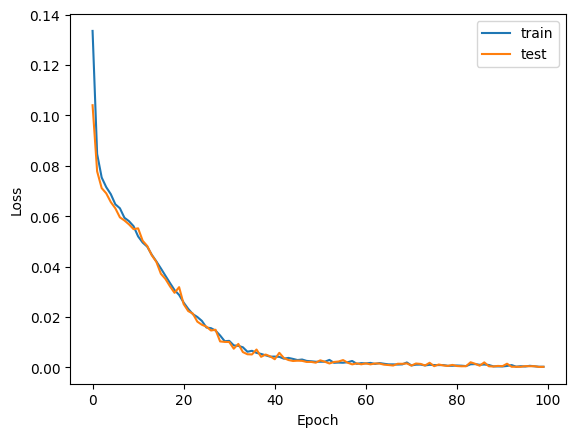

In [8]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
# Make predictions
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


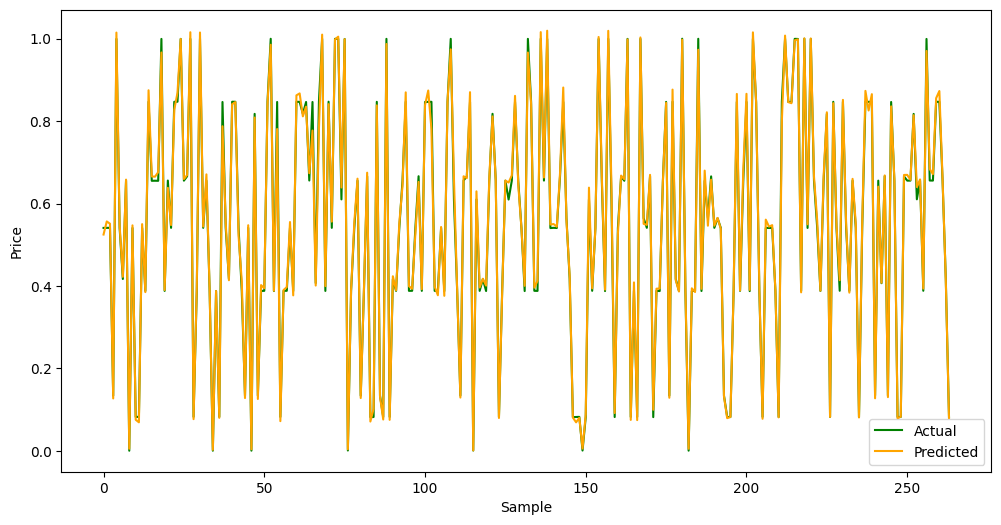

In [12]:
# Plot actual vs predicted prices with custom colors
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='green')
plt.plot(y_pred, label='Predicted', color='orange')
plt.xlabel('Sample')
plt.ylabel('Price')
plt.legend()
plt.show()
